Abstract:

Este dataset contiene toda la información recabada en 10 temporadas sobre todos los partidos que se disputaron de la premier league de Inglaterra durante 10 temporadas, siendo la misma bastante amplia, en la misma se detallan resultados, resultados parciales, tiros al arco, pases y más información. Consta de 4050 filas y 114 columnas, con la mayoría de sus variables numéricos lo cual facilita el análisis.

La idea en que se basará este trabajo será poder generar un modelo capaz de predecir los porcentajes de victoria para cada equipo en base a la información retrospectiva, usando un algoritmo de clasificación, este ultimo fue en elegido a través de las entregas anteriores en las cualés se pudo observar que los modelos de regresión no son los correctos para esta temática.

Para la exploración iniciar se intetará comparar variables con el fin de sacar algunas conclusiones iniciales a partir de visualizaciones, además de poder extraer información sobre cuales variables pesan más en el resultado del objetivo del trabajo. Luego de esto con base en el análisis incicial se generará un modelo con las variables más relevantes.

Contexto comercial:

Actualmente en el mercado existen muchas empresas de apuestas deportivas que precisan tener modelos predictivos precisos en los cuáles estimar los porcentajes de victoria, derrota, empate y demas items de diversos juegos deportivos, con los mismos las empresas asignan valores de ganancia a los distintos resultados y dependiendo de lo precisos que sean asignan un valor de ganancia por parte del apostante. Estas empresas generan ganancias o perdidas en base al acierto o fracaso de la persona que apuesta, en los casos de fracaso gana la empresa, en los casos de acierto gana el apostante.

Problema comercial:

¿Es posible predecir de forma precisa un resultado deportivo?

Contexto análitivo:

Tenemos la base de resultados deportivos junto con todas las variales referentes a cada partido de la premier league durante 10 temporadas, la idea es generar un modelo capaz de predecir cuál es el resultado más probable en base a lo acontecido en partidos anteriores, esto nos lleva a tener que utilizar un modelo de aprendizaje supervizado en principio, dado que precisamos orientar los resultados del análisis a casuisticas muy precisas. De todas formas un modelo del estilo Clustering(aunque sea no supervisado) puede servir para darnos los primeros indicios e identificar que es lo que hace parecerse a los equipos, incorporando nuevos items al análisis.

Objetivo:

Generar un modelo de predicción de victoria en base al dataset actual.






In [1]:
! pip install bqplot
! pip install pingouin

In [2]:
! pip install chart_studio

In [2]:
#Analisis exploratorio con interpretación de los gráficos
import pandas as pd
import numpy as np
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py

In [3]:
pl= pd.read_csv('premierleague.csv')

In [3]:
pl.shape

(4070, 114)

In [4]:
pl.dtypes

Unnamed: 0                    int64
link_match                   object
season                       object
date                         object
home_team                    object
                             ...   
sg_match_ft_acum_away       float64
goals_scored_ht_avg_away    float64
goals_conced_ht_avg_away    float64
sg_match_ht_acum_away       float64
performance_acum_away       float64
Length: 114, dtype: object

In [5]:
pl.head(10)

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
5,5,https://www.premierleague.com/match/7096,10/11,2010-08-16,Manchester United,Newcastle United,3-0,2-0,15.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,https://www.premierleague.com/match/7166,10/11,2010-10-18,Blackburn Rovers,Sunderland,0-0,0-0,30.0,5.0,...,22.0,554.3,1.4,1.00,1.00,0.0,0.29,0.29,0.0,38.1
7,7,https://www.premierleague.com/match/7258,10/11,2010-12-20,Manchester City,Everton,1-2,0-2,9.0,10.0,...,21.4,630.5,1.3,1.06,1.18,-2.0,0.41,0.65,-4.0,35.3
8,8,https://www.premierleague.com/match/7226,10/11,2010-11-22,Sunderland,Everton,2-2,1-1,44.0,4.0,...,19.8,638.8,1.0,1.08,1.00,1.0,0.38,0.54,-2.0,38.5
9,9,https://www.premierleague.com/match/7106,10/11,2010-08-23,Manchester City,Liverpool,3-0,1-0,24.0,5.0,...,30.0,531.0,1.0,1.00,1.00,0.0,0.00,0.00,0.0,33.3


In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

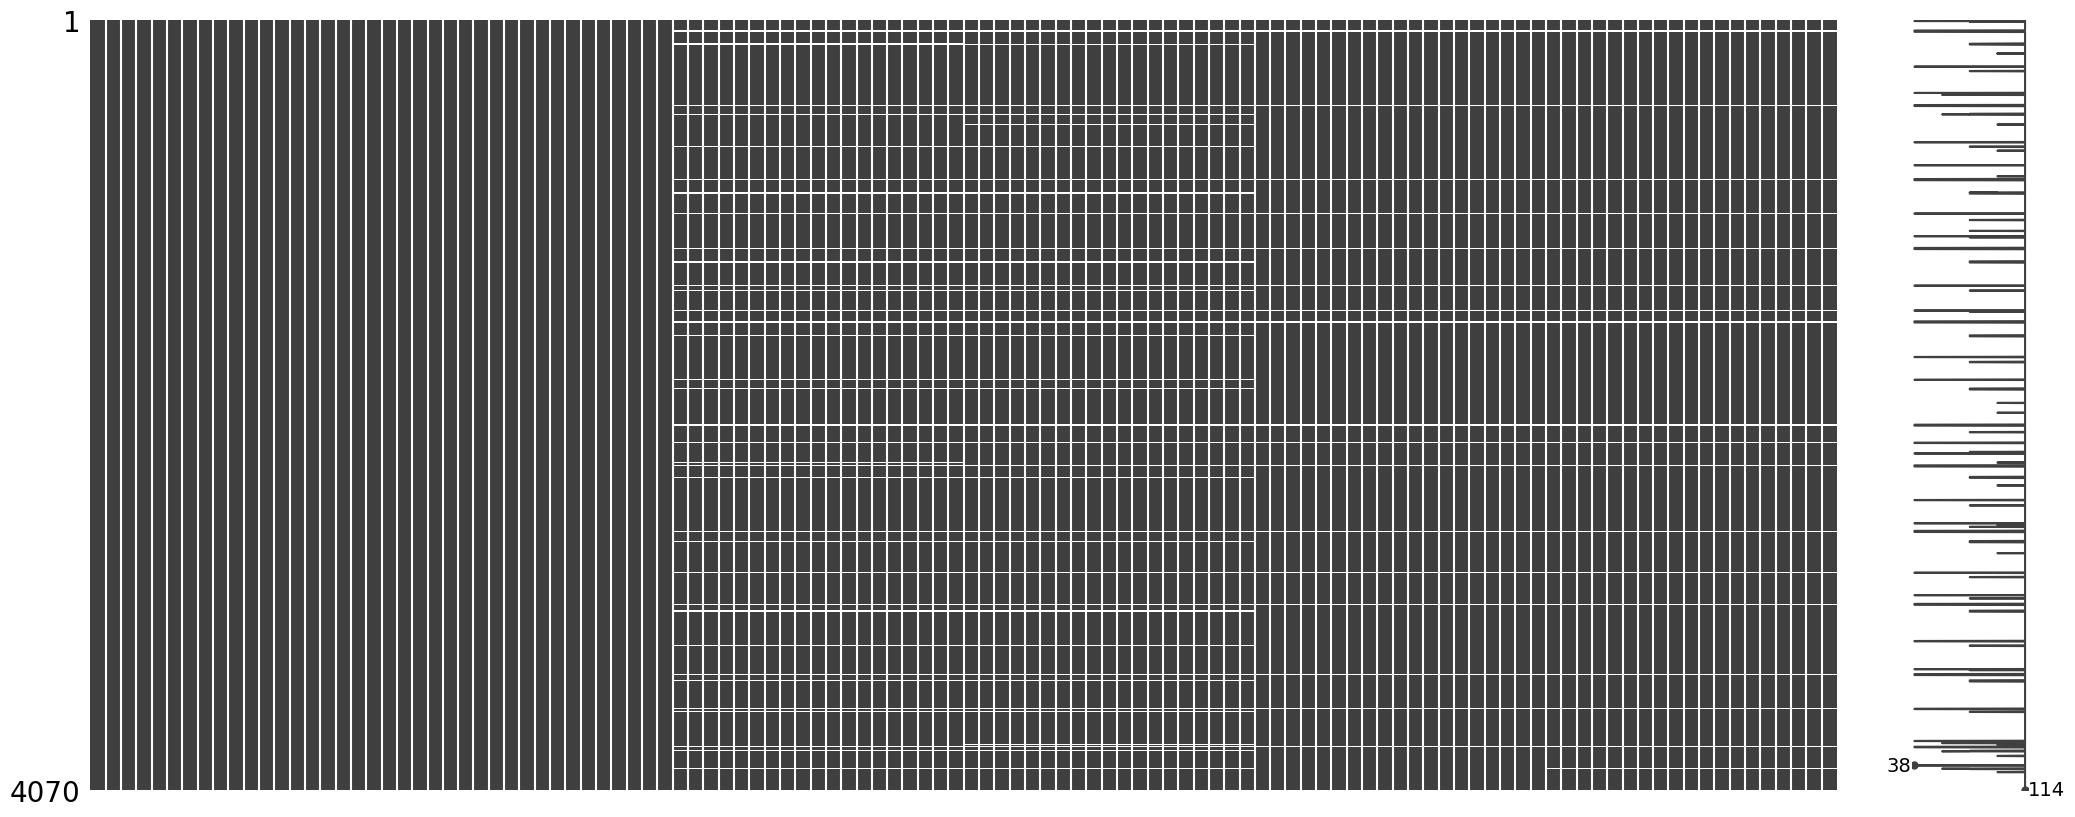

In [7]:
import missingno as msno
msno.matrix(pl)

Los valores nulos están en las columnas de variables que utiliza mi algoritmo(las medias o promedios de las variables de los equipos),mientras que las variables que sirven de primer vista del problema a resolver, o sea, las estadisticas "puras" por partido no contienen valores nulos, por lo cuál la decisión es hacer el primer análisis no se hará un borrado de nulos porque en general son columnas no utilizadas, mientras que se borraran todas las variables con nulos para el algoritmo por ser irrelevantes. En mi entendimiento el algoritmo precisa una suma alta de valores completos, de modo de que todas las casuisticas de juego estén representadas, los valores nulos simplemente distorcionarían las metricas, a su vez, modificarlos por una media o mediana del total de valores no es oportuno por ejemplo si estoy viendo dos equipos particulares, los promedios del total del dataset no tienen porqué representar el estilo de juego de ese equipo y trastocar los resultados del algoritmo. Se puede observar el borrado a partir de la line donde se empieza a generar el data set de variables para el algoritmo;"#Probar un modelo de clasificación, el model es capaz de predecir si ganó el local el partido?".

In [30]:
print(pl.shape)
train= pl.drop_duplicates()
print(pl.shape)
#No hay duplicados a borrar, lo cuál tiene sentido con el dataset, dado que cada partido es una línea del mismo.

(4070, 116)
(4070, 116)


DataStorytelling-Analisis Gráfico:

Mediante el análisis gráfico se intentará averiguar cuáles son los factores más importantes en el juego y por ende que pesan directamente en la victoria, de esta manera sacar algunos conclusiones de cuáles datos utilizar en el algoritmo final.

Preguntas a resonder:

Cuál es el resultado más probable en un juego?
victoria local, victoria visitante o el empate

¿La localía tiene un peso realativo en la victoria?

¿Qué factores de juego son más relevantes?
Tiros al arco, poseción, faltas.


In [4]:

pl['resultado']= ''
pl.loc[pl['goal_home_ft']>pl['goal_away_ft'],'resultado']= 'Victoria_local'
pl.loc[pl['goal_home_ft']<pl['goal_away_ft'],'resultado']= 'Derrota_local'
pl.loc[pl['goal_home_ft']==pl['goal_away_ft'],'resultado']= 'Empate'

pl['resultado']

      

0       Victoria_local
1       Victoria_local
2       Victoria_local
3       Victoria_local
4               Empate
             ...      
4065     Derrota_local
4066            Empate
4067            Empate
4068    Victoria_local
4069            Empate
Name: resultado, Length: 4070, dtype: object

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
resultados =pl['resultado'].value_counts()
resultados

Victoria_local    1835
Derrota_local     1235
Empate            1000
Name: resultado, dtype: int64

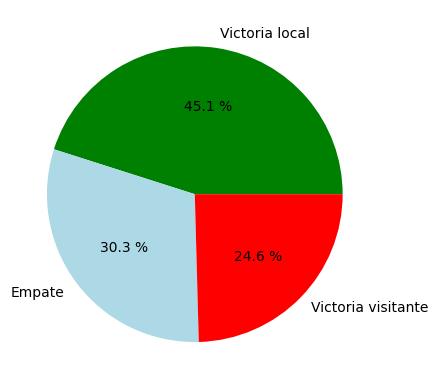

In [19]:
etiquetas_resultado= pl['resultado'].unique()
colors=["green","lightblue","red"]
plt.pie(resultados,labels=etiquetas_resultado,autopct="%0.1f %%", colors=colors)
plt.show()



Interpretación del grafico:
El resultado que mayor cantidad de veces se da en la muestra es la victorial del local, mientras que el menos veces ocurre es la victoria del visitante. El local tiene una ventaja relativa sobre el visitante a la hora de conseguir un resultado positivo, en el 75.1 porciento de los casos el local se lleva al menos un punto, en cuanto el visitante lo hace en el 54,7 de los casos.

In [5]:
pl['resultado_parcial']= ''
pl.loc[pl['goal_home_ht']>pl['goal_away_ht'],'resultado_parcial']= 'Victoria_local_parcial'
pl.loc[pl['goal_home_ht']<pl['goal_away_ht'],'resultado_parcial']= 'derrota_local_parcial'
pl.loc[pl['goal_home_ht']==pl['goal_away_ht'],'resultado_parcial']= 'Empate_parcial'

pl['resultado_parcial']

0       Victoria_local_parcial
1       Victoria_local_parcial
2       Victoria_local_parcial
3        derrota_local_parcial
4               Empate_parcial
                 ...          
4065            Empate_parcial
4066            Empate_parcial
4067            Empate_parcial
4068    Victoria_local_parcial
4069            Empate_parcial
Name: resultado_parcial, Length: 4070, dtype: object

In [6]:
final_parcial= pl[["resultado","resultado_parcial"]]
final_parcial


,resultado,resultado_parcial
0,Victoria_local,Victoria_local_parcial
1,Victoria_local,Victoria_local_parcial
2,Victoria_local,Victoria_local_parcial
3,Victoria_local,derrota_local_parcial
4,Empate,Empate_parcial
...,...,...
4065,Derrota_local,Empate_parcial
4066,Empate,Empate_parcial
4067,Empate,Empate_parcial
4068,Victoria_local,Victoria_local_parcial


In [11]:
resultado_parcial= final_parcial.set_index("resultado_parcial")
print(resultado_parcial)


                             resultado
resultado_parcial                     
Victoria_local_parcial  Victoria_local
Victoria_local_parcial  Victoria_local
Victoria_local_parcial  Victoria_local
derrota_local_parcial   Victoria_local
Empate_parcial                  Empate
...                                ...
Empate_parcial           Derrota_local
Empate_parcial                  Empate
Empate_parcial                  Empate
Victoria_local_parcial  Victoria_local
Empate_parcial                  Empate

[4070 rows x 1 columns]


In [109]:
visloc=resultado_parcial.loc[["Victoria local parcial","Victoria visitante parcial"]]
print(visloc)

                                     resultado
resultado_parcial                             
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
...                                        ...
Victoria visitante parcial      Victoria local
Victoria visitante parcial  Victoria visitante
Victoria visitante parcial  Victoria visitante
Victoria visitante parcial  Victoria visitante
Victoria visitante parcial  Victoria visitante

[2398 rows x 1 columns]


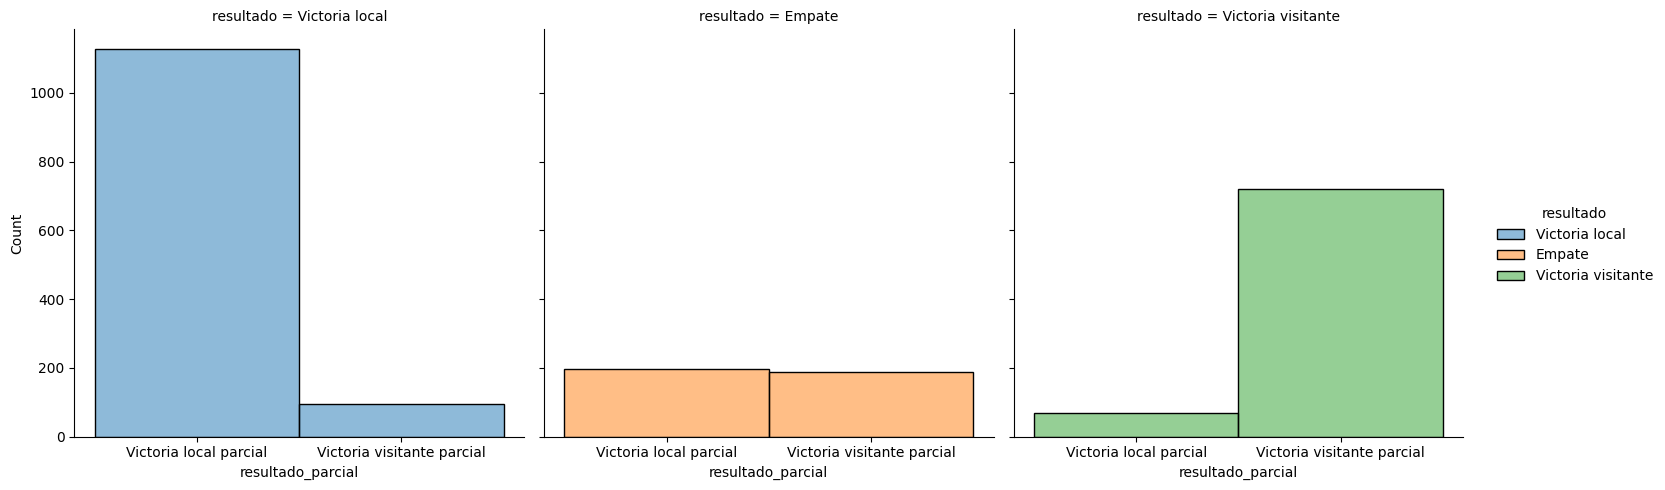

In [129]:
sns.displot(data=visloc, x="resultado_parcial",hue="resultado",col="resultado")
plt.show()


Este gráfico agrupado sirve para ver la ventaja relativa que tiene el local sobre el visitante si se va al descanso ganando, el visitante gana menos partidos que el local si se va al descanso ganando el partido, la teoría es que la localía tiene un peso relativo sobre la posible victoria, lo cual condice con el gráfico anterior.

In [5]:
local_goles_tiros= pl[["goal_home_ft","home_shots"]]
print(local_goles_tiros)
local_goles_tiros.corr("pearson")

      goal_home_ft  home_shots
0                2        26.0
1                3        21.0
2                1        17.0
3                2        21.0
4                0        13.0
...            ...         ...
4065             0        11.0
4066             1        12.0
4067             0         8.0
4068             1         9.0
4069             0         8.0

[4070 rows x 2 columns]


,goal_home_ft,home_shots
goal_home_ft,1.00000,0.28688
home_shots,0.28688,1.00000


In [48]:
visitante_goles_tiros= pl[["goal_away_ft","away_shots"]]
print(visitante_goles_tiros)
visitante_goles_tiros.corr("pearson")

      goal_away_ft  away_shots
0                1        14.0
1                0        12.0
2                0        11.0
3                1        11.0
4                0        25.0
...            ...         ...
4065             1        13.0
4066             1        16.0
4067             0        11.0
4068             0        16.0
4069             0        11.0

[4070 rows x 2 columns]


,goal_away_ft,away_shots
goal_away_ft,1.000000,0.323372
away_shots,0.323372,1.000000


,goal_away_ft,away_shots
goal_away_ft,1.000000,0.323372
away_shots,0.323372,1.000000


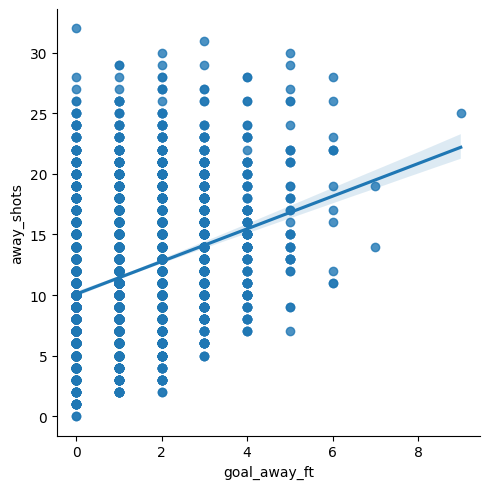

In [49]:
sns.lmplot(data=Total_goles_tiros,x= 'goal_away_ft', y='away_shots')
visitante_goles_tiros.corr("pearson")


,goal_home_ft,home_shots
goal_home_ft,1.00000,0.28688
home_shots,0.28688,1.00000


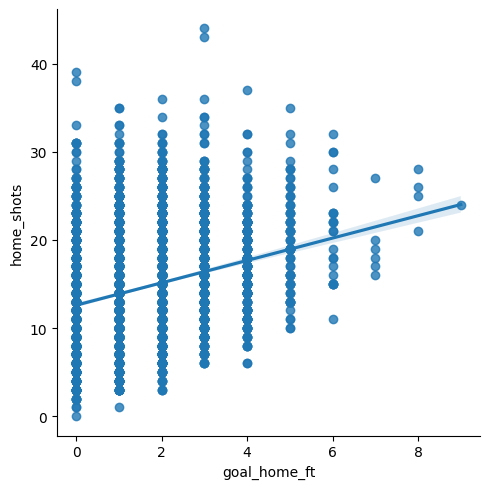

In [50]:
sns.lmplot(data=Total_goles_tiros,x= 'goal_home_ft', y='home_shots')
local_goles_tiros.corr("pearson")


Factores de victoria: Tiros al arco.

No existe una correlación lineal marcada, sino es una más bien baja, esto significaría que más tiros al arco se traducen en más goles, puede significar que lo importante a la hora de hacer goles es la efectividad y no tanto la cantidad de disparos al arco, lo interesante es que el equipo visitante convierte más con menos tiros al arco.

In [58]:
goles_tiros_al_arco_local= pl[["goal_home_ft","home_shots_on_target"]]
print(goles_tiros_al_arco_local)
goles_tiros_al_arco_visitante= pl[["goal_away_ft","away_shots_on_target"]]
print(goles_tiros_al_arco_visitante)
goles_tiros_al_arco_visitante.corr("pearson")

      goal_home_ft  home_shots_on_target
0                2                   5.0
1                3                   5.0
2                1                   6.0
3                2                   9.0
4                0                   5.0
...            ...                   ...
4065             0                   1.0
4066             1                   7.0
4067             0                   2.0
4068             1                   2.0
4069             0                   2.0

[4070 rows x 2 columns]
      goal_away_ft  away_shots_on_target
0                1                   4.0
1                0                   2.0
2                0                   5.0
3                1                   5.0
4                0                   3.0
...            ...                   ...
4065             1                   4.0
4066             1                   4.0
4067             0                   1.0
4068             0                   4.0
4069             0              

,goal_away_ft,away_shots_on_target
goal_away_ft,1.000000,0.580209
away_shots_on_target,0.580209,1.000000


In [59]:
goles_tiros_al_arco_local.corr("pearson")

,goal_home_ft,home_shots_on_target
goal_home_ft,1.000000,0.575109
home_shots_on_target,0.575109,1.000000


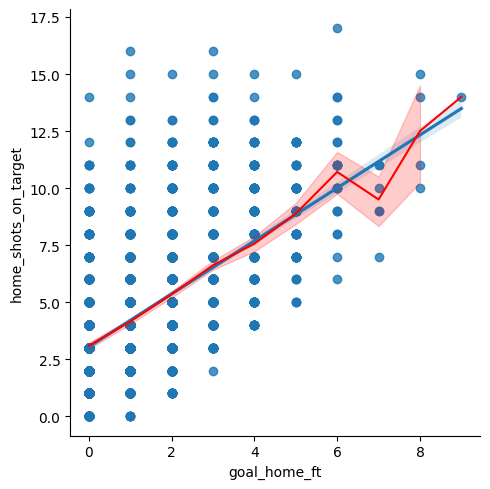

,goal_home_ft,home_shots_on_target
goal_home_ft,1.000000,0.575109
home_shots_on_target,0.575109,1.000000


In [63]:
sns.lmplot(data=pl, x="goal_home_ft", y="home_shots_on_target")
sns.lineplot(data=pl, x="goal_home_ft", y="home_shots_on_target", color='red')
plt.show()
goles_tiros_al_arco_local.corr("pearson")


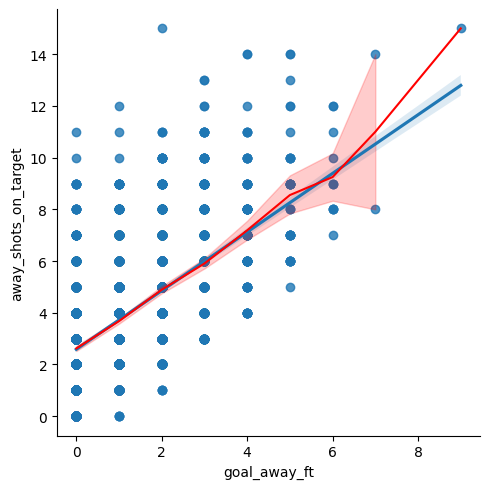

,goal_away_ft,away_shots_on_target
goal_away_ft,1.000000,0.580209
away_shots_on_target,0.580209,1.000000


In [62]:
sns.lmplot(data=pl, x="goal_away_ft", y="away_shots_on_target")
sns.lineplot(data=pl, x="goal_away_ft", y="away_shots_on_target", color='red')
plt.show()
goles_tiros_al_arco_visitante.corr("pearson")

Factores de victoria: tiros dentro los tres palos.

La correlación tiene una tendencia más clara cuando miramos la correlación con los tiros que efectivamente tienen dirección de portería, lo cual puede confirmar la hipótesis de que lo importante es la efectividad y no la cantidad de ocasiones generadas, al menos para los locales. Es interesante como en este apartado practicamente se igualan las correlaciones sin importar si el equipo es local o visitante. 

In [13]:
faltas= pl[["date","away_fouls_conceded","home_fouls_conceded","resultado"]]
faltas

,date,away_fouls_conceded,home_fouls_conceded,resultado
0,2010-11-01,13.0,16.0,Victoria_local
1,2011-04-11,3.0,6.0,Victoria_local
2,2010-12-13,17.0,9.0,Victoria_local
3,2010-09-13,14.0,12.0,Victoria_local
4,2011-02-14,13.0,11.0,Empate
...,...,...,...,...
4065,2021-02-03,6.0,12.0,Derrota_local
4066,2021-03-03,12.0,6.0,Empate
4067,2021-03-03,13.0,4.0,Empate
4068,2021-03-03,6.0,13.0,Victoria_local


In [17]:
possession= pl[["season","away_possession","resultado"]]
possession

possession2= possession[possession["resultado"]=="Victoria visitante"]
possession2



,season,away_possession,resultado


In [18]:
df_x=possession2[['season','away_possession']].groupby(by=['season']).mean().reset_index() 
df_x.head()

,season,away_possession


In [19]:
possessionl= pl[["season","home_possession","resultado"]]
possessionl2= possessionl.rename(columns={"season":"temporada"})

possession3= possessionl2[possession["resultado"]=="Victoria local"]
possession3


,temporada,home_possession,resultado


In [20]:
df_h=possession3[['temporada','home_possession']].groupby(by=['temporada']).mean().reset_index() 
df_h.head()

,temporada,home_possession


In [143]:
h= pd.concat([df_h,df_x], axis=1)
h
j= h.drop(columns=["temporada"])
j.index = j['season']
j


,home_possession,season,away_possession
season,,,
10/11,50.797207,10/11,48.877778
11/12,53.491813,11/12,51.592241
12/13,52.581325,12/13,51.256604
13/14,53.165922,13/14,50.448780
14/15,52.428488,14/15,49.266957
15/16,51.501923,15/16,48.705172
16/17,52.644920,16/17,54.206422
17/18,54.068786,17/18,53.377778
18/19,54.340331,18/19,53.094531


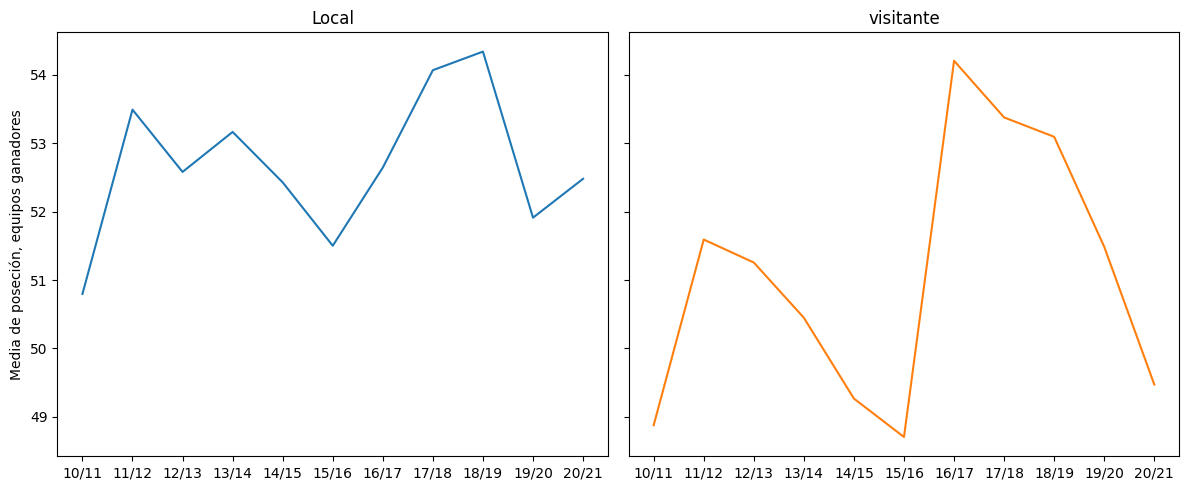

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(j.index, j['home_possession'], label='Poseción del local')
ax[1].plot(j.index, j['away_possession'], label='Poseción del visitante', color='C1')
ax[0].set_title('Local') 
ax[1].set_title('visitante') 
ax[0].set_ylabel('Media de poseción, equipos ganadores')
plt.tight_layout()


Factores de victoria: posesión:

Los locales suelen necesitar tener más el balón para ganar sus partidos que los visitantes de media, a su vez se puede ver una tendencia a la baja al final del periodo en la importancia relativa de la poseción para ganar los partidos.

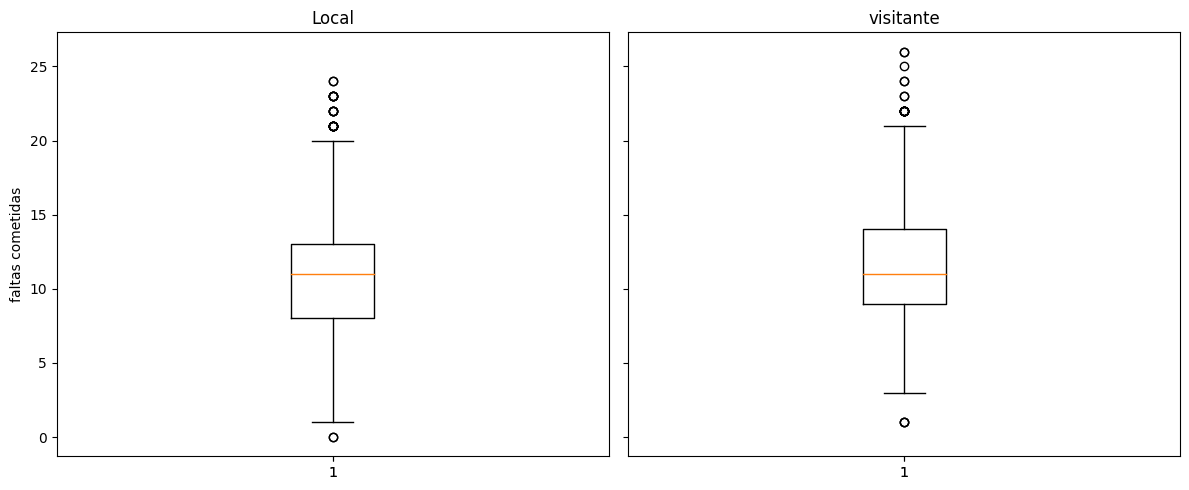

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].boxplot(x=pl['home_fouls_conceded'])
ax[1].boxplot(x=pl['away_fouls_conceded'])
ax[0].set_title('Local') 
ax[1].set_title('visitante') 
ax[0].set_ylabel('faltas cometidas')
plt.tight_layout()

In [174]:
pl['away_fouls_conceded'].mean()/pl['away_yellow_cards'].mean()


6.446279824932938

In [173]:
pl['home_fouls_conceded'].mean()/pl['home_yellow_cards'].mean()


7.210552268244576

Factores de juego: faltas.


El visitante suele hacer más faltas que el local, lo que en principio indicaría que le sacan más amarillas o rojas que al local, pero si se mira la cantidad de tarjetas que se le sacan por falta se puede ver que al local le sacan una amarilla cada 7,2 faltas y al visititante cada 6.44, lo que significa que la localía también puede tener efectos en los arbitros y contribuír a la victoria o derrota.

In [ ]:
#Prueba modelo de regresión

In [7]:
modelo= pl[['home_team','result_full','resultado_parcial','resultado','home_clearances','home_fouls_conceded','home_passes','home_possession','home_red_cards','home_shots','home_shots_on_target','home_tackles','home_touches','home_yellow_cards']]
modelo

,home_team,result_full,resultado_parcial,resultado,home_clearances,home_fouls_conceded,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards
0,Blackpool,2-1,Victoria_local_parcial,Victoria_local,15.0,16.0,550.0,65.4,0.0,26.0,5.0,19.0,740.0,2.0
1,Liverpool,3-0,Victoria_local_parcial,Victoria_local,16.0,6.0,527.0,53.1,0.0,21.0,5.0,31.0,750.0,1.0
2,Manchester United,1-0,Victoria_local_parcial,Victoria_local,26.0,9.0,430.0,46.1,0.0,17.0,6.0,27.0,635.0,0.0
3,Stoke City,2-1,derrota_local_parcial,Victoria_local,26.0,12.0,277.0,43.3,0.0,21.0,9.0,16.0,495.0,1.0
4,Fulham,0-0,Empate_parcial,Empate,50.0,11.0,333.0,37.4,0.0,13.0,5.0,32.0,576.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Liverpool,0-1,Empate_parcial,Derrota_local,15.0,12.0,697.0,63.4,0.0,11.0,1.0,12.0,886.0,1.0
4066,Burnley,1-1,Empate_parcial,Empate,13.0,6.0,351.0,38.9,0.0,12.0,7.0,8.0,522.0,0.0
4067,Crystal Palace,0-0,Empate_parcial,Empate,25.0,4.0,353.0,37.0,0.0,8.0,2.0,19.0,544.0,1.0
4068,Sheffield United,1-0,Victoria_local_parcial,Victoria_local,47.0,13.0,263.0,28.2,1.0,9.0,2.0,13.0,443.0,1.0


In [8]:
modelo2= pl[['home_team','away_team','resultado','home_clearances','home_fouls_conceded','home_passes','home_possession','home_red_cards','home_shots','home_shots_on_target','home_tackles','home_touches','home_yellow_cards']]
modelo2

,home_team,away_team,resultado,home_clearances,home_fouls_conceded,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards
0,Blackpool,West Bromwich Albion,Victoria_local,15.0,16.0,550.0,65.4,0.0,26.0,5.0,19.0,740.0,2.0
1,Liverpool,Manchester City,Victoria_local,16.0,6.0,527.0,53.1,0.0,21.0,5.0,31.0,750.0,1.0
2,Manchester United,Arsenal,Victoria_local,26.0,9.0,430.0,46.1,0.0,17.0,6.0,27.0,635.0,0.0
3,Stoke City,Aston Villa,Victoria_local,26.0,12.0,277.0,43.3,0.0,21.0,9.0,16.0,495.0,1.0
4,Fulham,Chelsea,Empate,50.0,11.0,333.0,37.4,0.0,13.0,5.0,32.0,576.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Liverpool,Brighton and Hove Albion,Derrota_local,15.0,12.0,697.0,63.4,0.0,11.0,1.0,12.0,886.0,1.0
4066,Burnley,Leicester City,Empate,13.0,6.0,351.0,38.9,0.0,12.0,7.0,8.0,522.0,0.0
4067,Crystal Palace,Manchester United,Empate,25.0,4.0,353.0,37.0,0.0,8.0,2.0,19.0,544.0,1.0
4068,Sheffield United,Aston Villa,Victoria_local,47.0,13.0,263.0,28.2,1.0,9.0,2.0,13.0,443.0,1.0


In [9]:
resultados3= pd.get_dummies(pl["resultado"], prefix= "resultado")
resultados3

,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
4065,1,0,0
4066,0,1,0
4067,0,1,0
4068,0,0,1


In [10]:
resultados2= pd.get_dummies(pl["resultado_parcial"], prefix= "resultado")
resultados2

,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
4065,1,0,0
4066,1,0,0
4067,1,0,0
4068,0,1,0


In [11]:
pl2= pd.concat([pl,resultados3], axis= 1)
pl2

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,resultado,resultado_parcial,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,-2.0,0.33,0.78,-4.0,55.6,Victoria_local,Victoria_local_parcial,0,0,1
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,23.0,0.87,0.32,17.0,60.2,Victoria_local,Victoria_local_parcial,0,0,1
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,16.0,0.94,0.38,9.0,66.7,Victoria_local,Victoria_local_parcial,0,0,1
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,-2.0,1.00,1.00,0.0,66.7,Victoria_local,derrota_local_parcial,0,0,1
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,24.0,0.84,0.48,9.0,58.7,Empate,Empate_parcial,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,https://www.premierleague.com/match/59113,20/21,2021-02-03,Liverpool,Brighton and Hove Albion,0-1,0-0,15.0,5.0,...,-6.0,0.52,0.67,-3.0,33.3,Derrota_local,Empate_parcial,1,0,0
4066,4066,https://www.premierleague.com/match/59177,20/21,2021-03-03,Burnley,Leicester City,1-1,1-1,13.0,5.0,...,15.0,0.77,0.58,5.0,62.8,Empate,Empate_parcial,0,1,0
4067,4067,https://www.premierleague.com/match/59178,20/21,2021-03-03,Crystal Palace,Manchester United,0-0,0-0,25.0,4.0,...,21.0,0.85,0.69,4.0,64.1,Empate,Empate_parcial,0,1,0
4068,4068,https://www.premierleague.com/match/59182,20/21,2021-03-03,Sheffield United,Aston Villa,1-0,1-0,47.0,2.0,...,12.0,0.67,0.42,6.0,54.2,Victoria_local,Victoria_local_parcial,0,0,1


In [12]:
pl3= pd.concat([pl2,resultados2], axis= 1)
pl3

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado,resultado_parcial,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,-4.0,55.6,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,17.0,60.2,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,9.0,66.7,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,0.0,66.7,Victoria_local,derrota_local_parcial,0,0,1,0,0,1
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,9.0,58.7,Empate,Empate_parcial,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,https://www.premierleague.com/match/59113,20/21,2021-02-03,Liverpool,Brighton and Hove Albion,0-1,0-0,15.0,5.0,...,-3.0,33.3,Derrota_local,Empate_parcial,1,0,0,1,0,0
4066,4066,https://www.premierleague.com/match/59177,20/21,2021-03-03,Burnley,Leicester City,1-1,1-1,13.0,5.0,...,5.0,62.8,Empate,Empate_parcial,0,1,0,1,0,0
4067,4067,https://www.premierleague.com/match/59178,20/21,2021-03-03,Crystal Palace,Manchester United,0-0,0-0,25.0,4.0,...,4.0,64.1,Empate,Empate_parcial,0,1,0,1,0,0
4068,4068,https://www.premierleague.com/match/59182,20/21,2021-03-03,Sheffield United,Aston Villa,1-0,1-0,47.0,2.0,...,6.0,54.2,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0


In [13]:
model2= 'resultado_Victoria_local~resultado_Victoria_local_parcial+ home_possession + home_passes + home_shots_on_target +home_shots'
lm1= sm.ols(formula= model2, data= pl3).fit()
print(lm1.summary())
#busqueda de mejores variables para el modelo

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       0.343
Model:                                  OLS   Adj. R-squared:                  0.342
Method:                       Least Squares   F-statistic:                     423.6
Date:                      Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                              16:52:12   Log-Likelihood:                -2080.6
No. Observations:                      4070   AIC:                             4173.
Df Residuals:                          4064   BIC:                             4211.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

el resultado sorprendente es que ni siquiera el hecho de irte ganando al descanso es totalmente condicionante de la victoria final aunque es la variable más relevante de las seleccionadas, lo cuál hace sentido con las primeras gráficas, que marcaban que los locales ganaban más partidos independientemente del resultado con el cuál se van al descanso.Incorporando otras estadisticas que parecen importantes en la victoria parece que tampoco son capaces de explicar con fuera la victoria, lo que indicaría que la regresión lineal no es un buen modelo para explicar los resultados en principio, seguramente es por la globalidad de la estadisticas, que toma equipos con distintos estilos de juego.

In [14]:
man= pl3[pl3["home_team"]=="Manchester City"].tail(20)
man

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado,resultado_parcial,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
3761,3761,https://www.premierleague.com/match/46809,19/20,2020-01-01,Manchester City,Everton,2-1,0-0,13.0,3.0,...,4.0,41.7,Victoria_local,Empate_parcial,0,0,1,1,0,0
3773,3773,https://www.premierleague.com/match/46961,19/20,2020-07-15,Manchester City,AFC Bournemouth,2-1,2-0,25.0,3.0,...,-13.0,29.5,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3776,3776,https://www.premierleague.com/match/46879,19/20,2020-06-17,Manchester City,Arsenal,3-0,1-0,6.0,5.0,...,-3.0,47.6,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3777,3777,https://www.premierleague.com/match/46860,19/20,2020-02-19,Manchester City,West Ham United,2-0,1-0,12.0,6.0,...,-2.0,32.0,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3796,3796,https://www.premierleague.com/match/46941,19/20,2020-07-08,Manchester City,Newcastle United,5-0,2-0,11.0,8.0,...,-5.0,43.4,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3847,3847,https://www.premierleague.com/match/59132,20/21,2021-02-13,Manchester City,Tottenham Hotspur,3-0,1-0,7.0,4.0,...,13.0,55.6,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3855,3855,https://www.premierleague.com/match/58941,20/21,2020-10-17,Manchester City,Arsenal,1-0,1-0,9.0,6.0,...,0.0,75.0,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3886,3886,https://www.premierleague.com/match/59042,20/21,2020-12-26,Manchester City,Newcastle United,2-0,1-0,15.0,7.0,...,-4.0,46.2,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3893,3893,https://www.premierleague.com/match/59151,20/21,2021-02-27,Manchester City,West Ham United,2-1,1-1,10.0,4.0,...,4.0,60.0,Victoria_local,Empate_parcial,0,0,1,1,0,0
3898,3898,https://www.premierleague.com/match/58992,20/21,2020-11-28,Manchester City,Burnley,5-0,3-0,20.0,6.0,...,-2.0,20.8,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0


In [16]:
model4= 'resultado_Victoria_local~resultado_Victoria_local_parcial+ home_possession + home_passes + home_shots_on_target'
lm1= sm.ols(formula= model4, data= man).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       0.517
Model:                                  OLS   Adj. R-squared:                  0.389
Method:                       Least Squares   F-statistic:                     4.020
Date:                      Sat, 22 Jul 2023   Prob (F-statistic):             0.0207
Time:                              16:54:15   Log-Likelihood:                -2.7675
No. Observations:                        20   AIC:                             15.54
Df Residuals:                            15   BIC:                             20.51
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Eligiendo un solo equipo y los ultimos partidos, con variables que se saben importantes para dicho equipo el modelo ajusta mejor pero sigue sin ser un ajuste que sirva para dar una predicción con fuerza.

In [17]:
man2= pl3[(pl3["home_team"]=="Manchester City")&(pl3["away_team"]=="Everton")].tail(20)
man2

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado,resultado_parcial,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
7,7,https://www.premierleague.com/match/7258,10/11,2010-12-20,Manchester City,Everton,1-2,0-2,9.0,10.0,...,-4.0,35.3,Derrota_local,derrota_local_parcial,1,0,0,0,0,1
532,532,https://www.premierleague.com/match/7519,11/12,2011-09-24,Manchester City,Everton,2-0,0-0,14.0,7.0,...,0.0,58.3,Victoria_local,Empate_parcial,0,0,1,1,0,0
780,780,https://www.premierleague.com/match/8006,12/13,2012-12-01,Manchester City,Everton,1-1,1-1,31.0,5.0,...,7.0,52.4,Empate,Empate_parcial,0,1,0,1,0,0
1344,1344,https://www.premierleague.com/match/9295,13/14,2013-10-05,Manchester City,Everton,3-1,2-1,14.0,8.0,...,3.0,66.7,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
1738,1738,https://www.premierleague.com/match/9753,14/15,2014-12-06,Manchester City,Everton,1-0,1-0,27.0,11.0,...,5.0,42.9,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
2263,2263,https://www.premierleague.com/match/12320,15/16,2016-01-13,Manchester City,Everton,0-0,0-0,15.0,12.0,...,4.0,45.0,Empate,Empate_parcial,0,1,0,1,0,0
2384,2384,https://www.premierleague.com/match/14115,16/17,2016-10-15,Manchester City,Everton,1-1,0-0,13.0,13.0,...,3.0,66.7,Empate,Empate_parcial,0,1,0,1,0,0
2678,2678,https://www.premierleague.com/match/22357,17/18,2017-08-21,Manchester City,Everton,1-1,0-1,6.0,7.0,...,1.0,100.0,Empate,derrota_local_parcial,0,1,0,0,0,1
3107,3107,https://www.premierleague.com/match/38473,18/19,2018-12-15,Manchester City,Everton,3-1,1-0,14.0,6.0,...,1.0,50.0,Victoria_local,Victoria_local_parcial,0,0,1,0,1,0
3761,3761,https://www.premierleague.com/match/46809,19/20,2020-01-01,Manchester City,Everton,2-1,0-0,13.0,3.0,...,4.0,41.7,Victoria_local,Empate_parcial,0,0,1,1,0,0


In [18]:
man2.shape

(10, 122)

In [19]:
model4= 'resultado_Victoria_local~resultado_Victoria_local_parcial+ home_possession + away_possession + away_passes + home_passes + home_shots_on_target + away_shots_on_target + away_red_cards + away_yellow_cards '
lm1= sm.ols(formula= model4, data= man2).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                     9376.
Date:                      Sat, 22 Jul 2023   Prob (F-statistic):            0.00799
Time:                              16:55:05   Log-Likelihood:                 48.869
No. Observations:                        10   AIC:                            -79.74
Df Residuals:                             1   BIC:                            -77.01
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

C:\Users\UruGlobal\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
model4= 'resultado_Victoria_local~+ home_possession + away_possession + away_passes + home_passes + home_shots_on_target + away_shots_on_target + away_red_cards + away_yellow_cards '
lm1= sm.ols(formula= model4, data= man2).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.953
Method:                       Least Squares   F-statistic:                     27.21
Date:                      Sat, 22 Jul 2023   Prob (F-statistic):             0.0359
Time:                              16:55:26   Log-Likelihood:                 15.576
No. Observations:                        10   AIC:                            -15.15
Df Residuals:                             2   BIC:                            -12.73
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

C:\Users\UruGlobal\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Ajustando aún más el modelo, seleccionando los ultimos partidos y sumando valores de ambos equipos el modelo adjusta aún mejor, consiguiendo un "R" con mucha más fuerza. Entonces, al menos para uno de los resultados posibles se puede entender que es importante las variables de ambos equipos, no alcanza con evaluar uno solo. No es totalmente relevante irse ganando en el primer tiempo para que el resultado final sea positivo en el caso de estos dos equipos, cuando en este caso el Manchester City juega de local, el aspecto de como terminó el primer tiempo no fue relevante en el desarrollo final del encuentro, por lo cuál al menos para este analisis podría quitarse del modelo.

In [ ]:
#Probar un modelo de clasificación, el model es capaz de predecir si ganó el local el partido?

In [11]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [15]:
prueba= pl[["resultado","yellow_cards_avg_away","yellow_cards_avg_home","shots_on_target_avg_away","shots_on_target_avg_home","goals_scored_ft_avg_H","possession_avg_A","passes_avg_A","possession_avg_H","passes_avg_H","goals_conced_ft_avg_H","goals_scored_ft_avg_A","goals_conced_ft_avg_A","performance_acum_home","performance_acum_away","performance_acum_H","performance_acum_A"]]
prueba



,resultado,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,Victoria_local,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3
1,Victoria_local,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9
2,Victoria_local,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8
3,Victoria_local,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0
4,Empate,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Derrota_local,1.5,1.0,3.5,5.9,2.10,50.0,469.3,65.8,686.5,0.90,1.20,1.40,63.5,33.3,76.7,40.0
4066,Empate,1.8,1.3,4.5,2.9,0.77,51.0,483.3,42.5,372.1,1.08,1.92,0.85,35.9,62.8,41.0,76.9
4067,Empate,1.6,1.2,5.9,3.1,1.08,54.1,533.6,42.2,389.4,1.67,1.92,1.00,42.7,64.1,41.7,74.4
4068,Victoria_local,1.7,1.8,5.3,3.0,0.69,46.3,379.1,44.6,418.6,1.54,1.38,0.77,14.1,54.2,17.9,59.0


<Axes: >

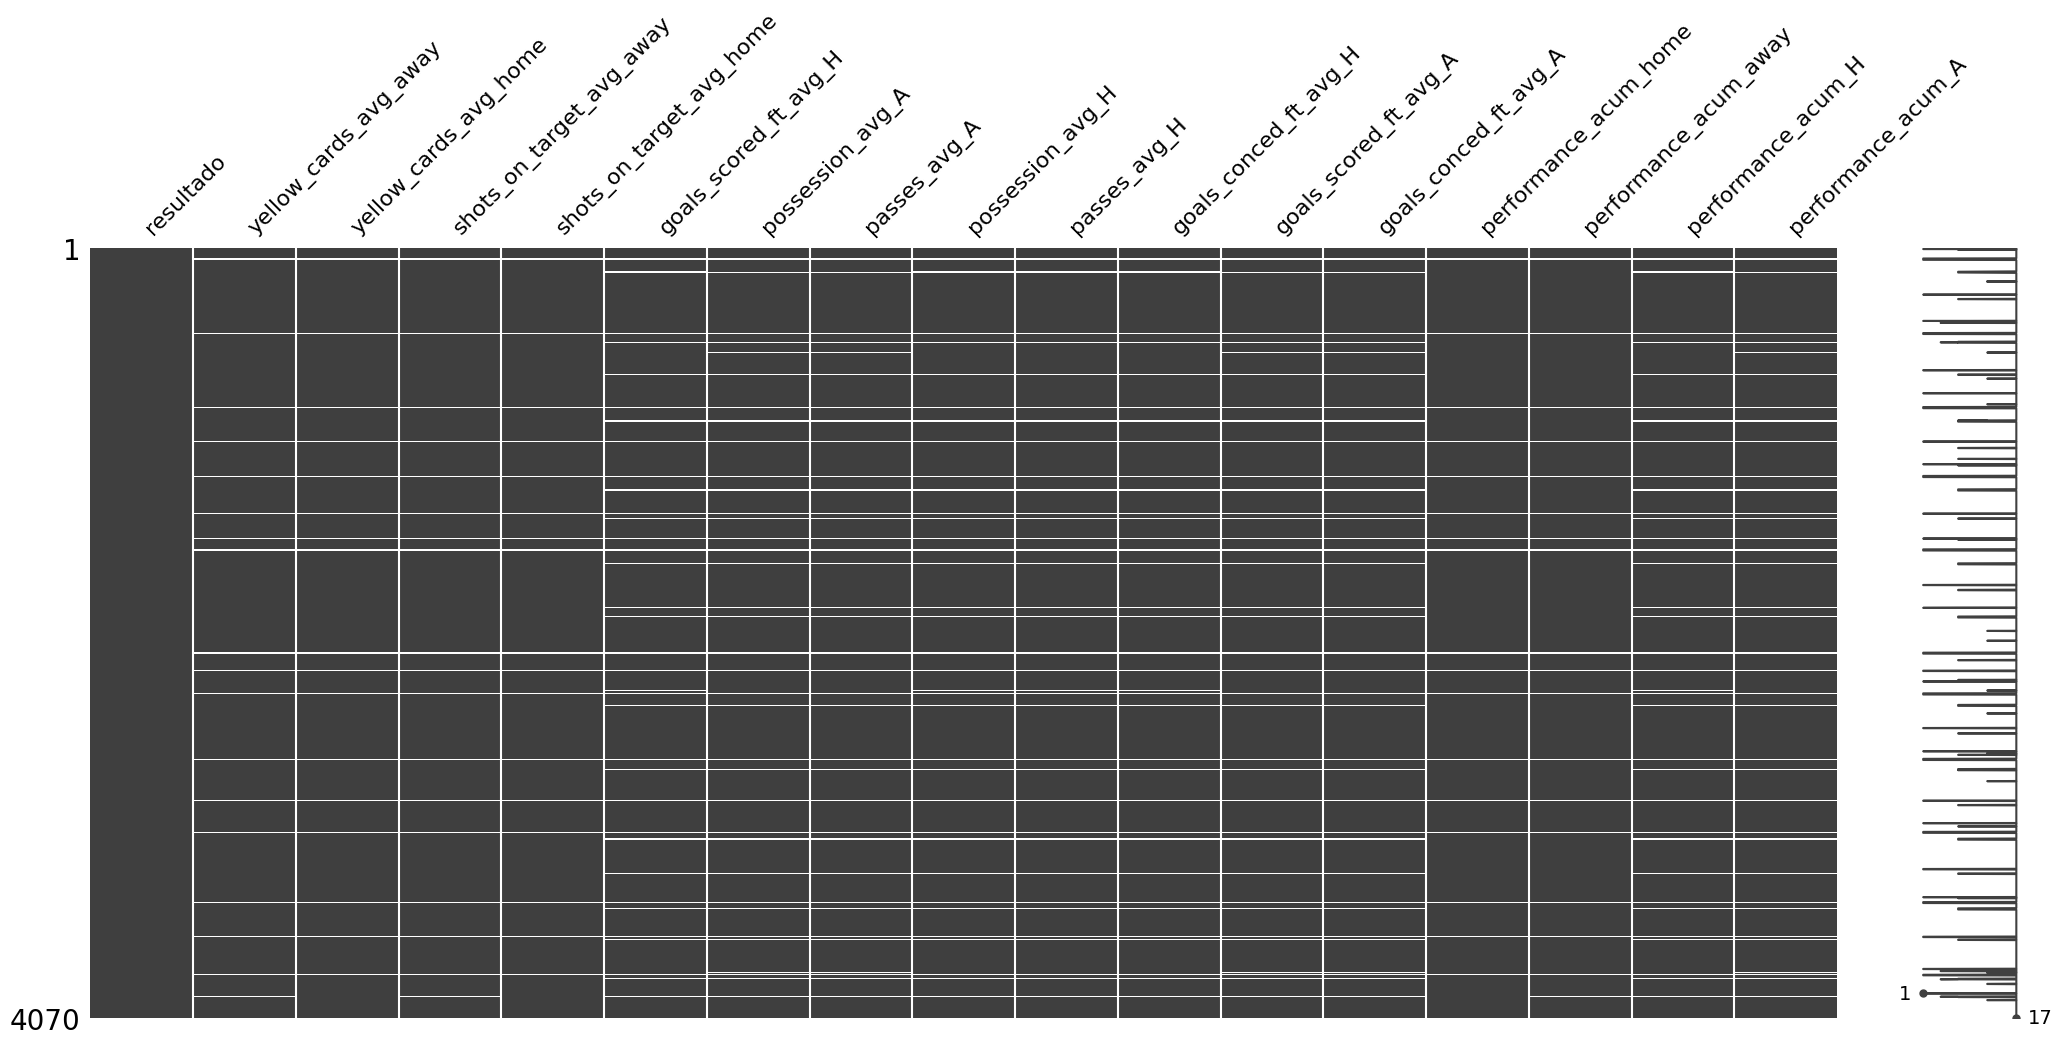

In [28]:
msno.matrix(prueba)

In [25]:
prueba.isnull().sum()

resultado                     0
yellow_cards_avg_away       110
yellow_cards_avg_home       110
shots_on_target_avg_away    110
shots_on_target_avg_home    110
goals_scored_ft_avg_H       220
possession_avg_A            220
passes_avg_A                220
possession_avg_H            220
passes_avg_H                220
goals_conced_ft_avg_H       220
goals_scored_ft_avg_A       220
goals_conced_ft_avg_A       220
performance_acum_home       110
performance_acum_away       110
performance_acum_H          220
performance_acum_A          220
dtype: int64

In [27]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   resultado                 4070 non-null   object 
 1   yellow_cards_avg_away     3960 non-null   float64
 2   yellow_cards_avg_home     3960 non-null   float64
 3   shots_on_target_avg_away  3960 non-null   float64
 4   shots_on_target_avg_home  3960 non-null   float64
 5   goals_scored_ft_avg_H     3850 non-null   float64
 6   possession_avg_A          3850 non-null   float64
 7   passes_avg_A              3850 non-null   float64
 8   possession_avg_H          3850 non-null   float64
 9   passes_avg_H              3850 non-null   float64
 10  goals_conced_ft_avg_H     3850 non-null   float64
 11  goals_scored_ft_avg_A     3850 non-null   float64
 12  goals_conced_ft_avg_A     3850 non-null   float64
 13  performance_acum_home     3960 non-null   float64
 14  performa

In [23]:
prueba3= prueba.dropna(axis=0,how= "any")
prueba3.shape
#se decide el borrado de todas las columnas con nulos dado que en la mayoría de los casos, todos o casi todos los valores de dicha fila están nulos y la cantidad de valores que quedan con todas sus variables completas es más del 90% del dataset.

(3841, 17)

In [14]:
prueba3

,resultado,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,Victoria_local,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3
1,Victoria_local,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9
2,Victoria_local,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8
3,Victoria_local,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0
4,Empate,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Derrota_local,1.5,1.0,3.5,5.9,2.10,50.0,469.3,65.8,686.5,0.90,1.20,1.40,63.5,33.3,76.7,40.0
4066,Empate,1.8,1.3,4.5,2.9,0.77,51.0,483.3,42.5,372.1,1.08,1.92,0.85,35.9,62.8,41.0,76.9
4067,Empate,1.6,1.2,5.9,3.1,1.08,54.1,533.6,42.2,389.4,1.67,1.92,1.00,42.7,64.1,41.7,74.4
4068,Victoria_local,1.7,1.8,5.3,3.0,0.69,46.3,379.1,44.6,418.6,1.54,1.38,0.77,14.1,54.2,17.9,59.0


In [33]:
prueba2= pd.get_dummies(data=prueba3, drop_first=True).head(3000)
prueba2  

,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A,resultado_Empate,resultado_Victoria_local
0,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3,0,1
1,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9,0,1
2,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8,0,1
3,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0,0,1
4,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,1.6,1.8,2.2,4.8,1.50,32.8,279.5,47.0,439.0,1.00,1.00,3.50,40.0,13.3,50.0,16.7,0,1
3177,1.8,1.0,4.6,7.2,2.50,45.6,361.0,67.4,719.0,0.00,1.50,1.00,100.0,33.3,100.0,50.0,0,1
3178,1.0,1.8,4.4,5.8,1.00,54.8,497.5,51.6,486.5,2.00,0.50,1.00,60.0,53.3,50.0,50.0,1,0
3179,1.8,1.5,4.5,4.3,1.92,44.8,413.3,46.9,414.6,1.31,1.17,1.17,42.3,50.0,61.5,50.0,1,0


In [16]:
objetivo_prueba= prueba2["resultado_Victoria_local"].head(3000)
objetivo_prueba

0       1
1       1
2       1
3       1
4       0
       ..
3176    1
3177    1
3178    0
3179    0
3180    1
Name: resultado_Victoria_local, Length: 3000, dtype: uint8

In [34]:
explicativas_prueba= prueba2[["yellow_cards_avg_away","yellow_cards_avg_home","shots_on_target_avg_away","shots_on_target_avg_home","goals_scored_ft_avg_H","possession_avg_A","passes_avg_A","possession_avg_H","passes_avg_H","goals_conced_ft_avg_H","goals_scored_ft_avg_A","goals_conced_ft_avg_A","performance_acum_home","performance_acum_away","performance_acum_H","performance_acum_A"]].head(3000)
explicativas_prueba

,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3
1,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9
2,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8
3,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0
4,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,1.6,1.8,2.2,4.8,1.50,32.8,279.5,47.0,439.0,1.00,1.00,3.50,40.0,13.3,50.0,16.7
3177,1.8,1.0,4.6,7.2,2.50,45.6,361.0,67.4,719.0,0.00,1.50,1.00,100.0,33.3,100.0,50.0
3178,1.0,1.8,4.4,5.8,1.00,54.8,497.5,51.6,486.5,2.00,0.50,1.00,60.0,53.3,50.0,50.0
3179,1.8,1.5,4.5,4.3,1.92,44.8,413.3,46.9,414.6,1.31,1.17,1.17,42.3,50.0,61.5,50.0


In [18]:
model= DecisionTreeClassifier(max_depth=4)

In [19]:
model.fit(X=explicativas_prueba, y=objetivo_prueba)

DecisionTreeClassifier(max_depth=4)

In [20]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'shots_on_target_avg_home <= 4.95\ngini = 0.497\nsamples = 3000\nvalue = [1616, 1384]'),
 Text(0.25, 0.7, 'performance_acum_away <= 52.85\ngini = 0.47\nsamples = 2118\nvalue = [1317, 801]'),
 Text(0.125, 0.5, 'performance_acum_home <= 51.6\ngini = 0.495\nsamples = 1436\nvalue = [790, 646]'),
 Text(0.0625, 0.3, 'passes_avg_A <= 410.8\ngini = 0.49\nsamples = 1267\nvalue = [724, 543]'),
 Text(0.03125, 0.1, 'gini = 0.497\nsamples = 880\nvalue = [473, 407]'),
 Text(0.09375, 0.1, 'gini = 0.456\nsamples = 387\nvalue = [251, 136]'),
 Text(0.1875, 0.3, 'possession_avg_H <= 52.95\ngini = 0.476\nsamples = 169\nvalue = [66, 103]'),
 Text(0.15625, 0.1, 'gini = 0.498\nsamples = 91\nvalue = [48, 43]'),
 Text(0.21875, 0.1, 'gini = 0.355\nsamples = 78\nvalue = [18, 60]'),
 Text(0.375, 0.5, 'shots_on_target_avg_away <= 4.45\ngini = 0.351\nsamples = 682\nvalue = [527, 155]'),
 Text(0.3125, 0.3, 'performance_acum_away <= 55.75\ngini = 0.47\nsamples = 77\nvalue = [48, 29]'),
 Text(0.28125, 

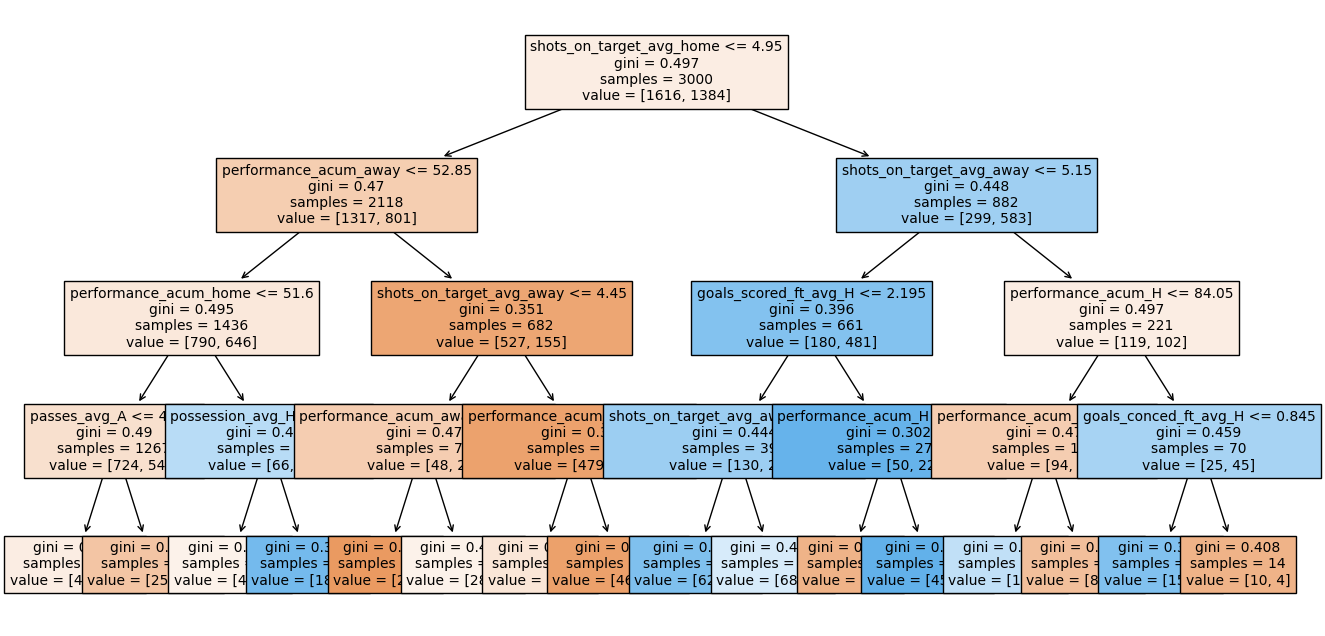

In [21]:
plt.figure(figsize=(16, 8))
plot_tree(decision_tree=model, feature_names=explicativas_prueba.columns, filled=True, fontsize=10)

In [23]:
#Prediction
a= explicativas_prueba.sample()
a

,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
684,1.2,1.3,6.4,4.4,1.58,54.2,470.2,46.3,395.4,1.25,2.0,0.83,46.7,77.3,52.8,75.0


In [24]:
model.predict_proba(a)

array([[0.79897785, 0.20102215]])

El modelo me dice que para la linea 684 el equipo local tiene un 80% de chances de haber ganado dicho partido

In [31]:
y_pred=model.predict(explicativas_prueba)
y_pred.shape

(3000,)

<Axes: xlabel='shots_on_target_avg_home', ylabel='Count'>

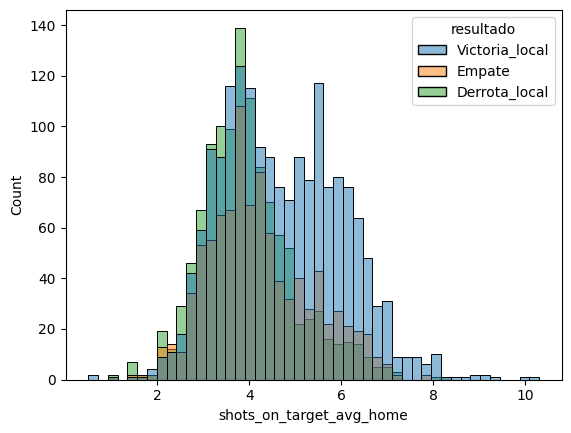

In [27]:
sns.histplot(x=prueba3.shots_on_target_avg_home, hue=prueba3.resultado)

In [35]:
prueba2["pred"]=y_pred

In [44]:
prueba2.sample(100)[["resultado_Victoria_local","pred"]]

,resultado_Victoria_local,pred
626,0,0
2145,0,0
1318,0,0
1820,0,0
1577,0,0
...,...,...
1322,0,0
1715,1,1
1358,0,0
2293,0,0


In [45]:
(prueba2["resultado_Victoria_local"]==prueba2["pred"]).sum()

3000

Con las variables explicativas el modelo puede explicar el 100% de los resultados

In [63]:
#Test
test= prueba3[["yellow_cards_avg_away","yellow_cards_avg_home","shots_on_target_avg_away","shots_on_target_avg_home","goals_scored_ft_avg_H","possession_avg_A","passes_avg_A","possession_avg_H","passes_avg_H","goals_conced_ft_avg_H","goals_scored_ft_avg_A","goals_conced_ft_avg_A","performance_acum_home","performance_acum_away","performance_acum_H","performance_acum_A"]].head(3300)
test

,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3
1,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9
2,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8
3,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0
4,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,1.7,1.4,4.4,4.2,1.36,41.3,348.7,56.2,510.4,1.09,1.27,2.09,36.4,31.8,48.5,21.2
3498,1.5,1.8,3.2,7.1,2.64,47.0,410.0,64.7,676.3,0.91,0.91,1.27,71.2,43.9,75.8,39.4
3499,1.8,1.6,5.9,3.3,1.00,58.0,596.0,36.5,327.2,1.09,2.27,1.73,39.4,59.1,48.5,66.7
3500,2.0,2.0,3.2,4.0,1.55,49.4,440.4,49.2,458.4,2.27,0.91,1.64,21.2,30.3,27.3,30.3


In [64]:
test2=test.tail(300)

In [75]:
explicativas_test= prueba3[["yellow_cards_avg_away","yellow_cards_avg_home","shots_on_target_avg_away","shots_on_target_avg_home","goals_scored_ft_avg_H","possession_avg_A","passes_avg_A","possession_avg_H","passes_avg_H","goals_conced_ft_avg_H","goals_scored_ft_avg_A","goals_conced_ft_avg_A","performance_acum_home","performance_acum_away","performance_acum_H","performance_acum_A"]].tail(300)
explicativas_test

,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
3748,2.2,1.8,4.1,4.0,1.17,53.8,501.7,45.9,384.0,1.67,1.11,1.28,28.7,49.1,38.9,37.0
3749,1.6,2.0,6.8,3.2,1.22,66.1,680.3,43.7,369.3,1.28,2.28,1.22,31.5,69.4,44.4,57.4
3750,1.6,1.1,4.2,5.2,2.00,54.0,509.9,57.0,524.2,1.00,1.00,1.67,60.0,35.6,66.7,24.4
3751,1.8,2.1,4.3,4.4,1.87,42.7,381.1,53.8,518.7,1.07,0.80,1.60,46.7,30.0,60.0,26.7
3752,1.9,1.9,7.1,4.1,1.57,66.4,644.9,40.7,338.6,1.29,2.57,1.43,42.9,69.0,57.1,61.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,1.5,1.0,3.5,5.9,2.10,50.0,469.3,65.8,686.5,0.90,1.20,1.40,63.5,33.3,76.7,40.0
4066,1.8,1.3,4.5,2.9,0.77,51.0,483.3,42.5,372.1,1.08,1.92,0.85,35.9,62.8,41.0,76.9
4067,1.6,1.2,5.9,3.1,1.08,54.1,533.6,42.2,389.4,1.67,1.92,1.00,42.7,64.1,41.7,74.4
4068,1.7,1.8,5.3,3.0,0.69,46.3,379.1,44.6,418.6,1.54,1.38,0.77,14.1,54.2,17.9,59.0


In [76]:
model.predict_proba(explicativas_test)
#probabilidad de victoria del equipo local para cada partido en base a los promedios de las variables de los equipos hasta el momento

array([[0.64857881, 0.35142119],
       [0.79897785, 0.20102215],
       [0.44444444, 0.55555556],
       [0.5375    , 0.4625    ],
       [0.79897785, 0.20102215],
       [0.64857881, 0.35142119],
       [0.64857881, 0.35142119],
       [0.79897785, 0.20102215],
       [0.79897785, 0.20102215],
       [0.64857881, 0.35142119],
       [0.64857881, 0.35142119],
       [0.79897785, 0.20102215],
       [0.5375    , 0.4625    ],
       [0.17110266, 0.82889734],
       [0.79897785, 0.20102215],
       [0.5375    , 0.4625    ],
       [0.64857881, 0.35142119],
       [0.5375    , 0.4625    ],
       [0.64857881, 0.35142119],
       [0.5375    , 0.4625    ],
       [0.64857881, 0.35142119],
       [0.79897785, 0.20102215],
       [0.79897785, 0.20102215],
       [0.79897785, 0.20102215],
       [0.64857881, 0.35142119],
       [0.17110266, 0.82889734],
       [0.64857881, 0.35142119],
       [0.5375    , 0.4625    ],
       [0.17110266, 0.82889734],
       [0.17110266, 0.82889734],
       [0.

In [93]:
prob=model.predict_proba(explicativas_test)

In [83]:
model.predict(explicativas_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], d

In [77]:
y_test_pred= model.predict(explicativas_test)

In [78]:
df2=prueba3.head(3300)

In [79]:
df3= df2.tail(300)
df3

,resultado,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
3181,Derrota_local,1.7,1.7,3.9,4.7,1.08,42.7,394.2,52.2,450.8,1.08,1.38,1.69,41.0,34.6,38.9,35.9
3182,Victoria_local,1.4,1.4,3.3,3.2,0.92,47.7,429.7,43.2,371.0,1.38,0.67,2.17,32.1,14.1,33.3,16.7
3183,Empate,1.7,2.1,4.8,2.7,1.60,50.8,433.8,35.8,310.4,1.20,1.50,1.67,38.9,47.2,66.7,50.0
3184,Victoria_local,1.4,1.4,3.2,4.5,2.00,29.4,246.4,57.3,455.7,1.00,0.40,2.20,52.8,22.2,72.2,6.7
3185,Victoria_local,2.0,1.8,4.5,3.8,1.20,42.9,388.7,58.3,557.6,2.60,0.67,2.17,13.9,22.2,26.7,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,Empate,1.7,1.4,4.4,4.2,1.36,41.3,348.7,56.2,510.4,1.09,1.27,2.09,36.4,31.8,48.5,21.2
3498,Empate,1.5,1.8,3.2,7.1,2.64,47.0,410.0,64.7,676.3,0.91,0.91,1.27,71.2,43.9,75.8,39.4
3499,Victoria_local,1.8,1.6,5.9,3.3,1.00,58.0,596.0,36.5,327.2,1.09,2.27,1.73,39.4,59.1,48.5,66.7
3500,Victoria_local,2.0,2.0,3.2,4.0,1.55,49.4,440.4,49.2,458.4,2.27,0.91,1.64,21.2,30.3,27.3,30.3


In [84]:
df3_test= pd.get_dummies(data=df3, drop_first=True).head(3000)
df3_test 

,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A,resultado_Empate,resultado_Victoria_local
3181,1.7,1.7,3.9,4.7,1.08,42.7,394.2,52.2,450.8,1.08,1.38,1.69,41.0,34.6,38.9,35.9,0,0
3182,1.4,1.4,3.3,3.2,0.92,47.7,429.7,43.2,371.0,1.38,0.67,2.17,32.1,14.1,33.3,16.7,0,1
3183,1.7,2.1,4.8,2.7,1.60,50.8,433.8,35.8,310.4,1.20,1.50,1.67,38.9,47.2,66.7,50.0,1,0
3184,1.4,1.4,3.2,4.5,2.00,29.4,246.4,57.3,455.7,1.00,0.40,2.20,52.8,22.2,72.2,6.7,0,1
3185,2.0,1.8,4.5,3.8,1.20,42.9,388.7,58.3,557.6,2.60,0.67,2.17,13.9,22.2,26.7,22.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,1.7,1.4,4.4,4.2,1.36,41.3,348.7,56.2,510.4,1.09,1.27,2.09,36.4,31.8,48.5,21.2,1,0
3498,1.5,1.8,3.2,7.1,2.64,47.0,410.0,64.7,676.3,0.91,0.91,1.27,71.2,43.9,75.8,39.4,1,0
3499,1.8,1.6,5.9,3.3,1.00,58.0,596.0,36.5,327.2,1.09,2.27,1.73,39.4,59.1,48.5,66.7,0,1
3500,2.0,2.0,3.2,4.0,1.55,49.4,440.4,49.2,458.4,2.27,0.91,1.64,21.2,30.3,27.3,30.3,0,1


In [89]:
df3_test["pred"]=y_test_pred
df3_test["pred"]

3181    0
3182    0
3183    1
3184    0
3185    0
       ..
3497    1
3498    0
3499    0
3500    0
3501    0
Name: pred, Length: 300, dtype: uint8

In [102]:
df3_test[["resultado_Victoria_local","pred"]].head(10)

,resultado_Victoria_local,pred
3181,0,0
3182,1,0
3183,0,1
3184,1,0
3185,1,0
3186,0,0
3187,1,0
3188,0,0
3189,0,0
3190,0,0


In [92]:
(df3_test["resultado_Victoria_local"]==df3_test["pred"]).sum()

156

In [106]:
explicativas_test2= prueba3[["yellow_cards_avg_away","yellow_cards_avg_home","shots_on_target_avg_away","shots_on_target_avg_home","goals_scored_ft_avg_H","possession_avg_A","passes_avg_A","possession_avg_H","passes_avg_H","goals_conced_ft_avg_H","goals_scored_ft_avg_A","goals_conced_ft_avg_A","performance_acum_home","performance_acum_away","performance_acum_H","performance_acum_A"]].head(10)
model.predict_proba(explicativas_test2)

array([[0.83333333, 0.16666667],
       [0.44444444, 0.55555556],
       [0.26785714, 0.73214286],
       [0.52830189, 0.47169811],
       [0.79897785, 0.20102215],
       [0.5375    , 0.4625    ],
       [0.52747253, 0.47252747],
       [0.64857881, 0.35142119],
       [0.79897785, 0.20102215],
       [0.79897785, 0.20102215]])

In [104]:
156/300

0.52

El modelo en principio se puede decir que tiene overfiting, acierta el resultado de manera exacta para el 52 porciento de los casos de prueba,mientras lo hace para el 100% en los casos de la muestra utilizada para entrenar el modelo, de todas formas teniendo en cuenta que predice un porcentaje y en algunos casos es muy "parejo" por decirlo de alguna manera, hace bastante sentido que el modelo erre en casos que la probabilidad sea cercana al 50 porciento, además del hecho que hay dos resultados posible para la "no victoria" que son el empate y la derrota del local

In [112]:
prueba2
#se puede mejorar el modelo eliminando variables?

,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A,resultado_Empate,resultado_Victoria_local,pred
0,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3,0,0,0
1,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9,0,1,1
2,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8,0,1,1
3,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0,0,0,0
4,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,1.6,1.8,2.2,4.8,1.50,32.8,279.5,47.0,439.0,1.00,1.00,3.50,40.0,13.3,50.0,16.7,0,0,0
3177,1.8,1.0,4.6,7.2,2.50,45.6,361.0,67.4,719.0,0.00,1.50,1.00,100.0,33.3,100.0,50.0,0,1,1
3178,1.0,1.8,4.4,5.8,1.00,54.8,497.5,51.6,486.5,2.00,0.50,1.00,60.0,53.3,50.0,50.0,1,1,1
3179,1.8,1.5,4.5,4.3,1.92,44.8,413.3,46.9,414.6,1.31,1.17,1.17,42.3,50.0,61.5,50.0,1,0,0


In [137]:
df3= prueba2[["resultado_Victoria_local","yellow_cards_avg_away","yellow_cards_avg_home","shots_on_target_avg_away","shots_on_target_avg_home","goals_scored_ft_avg_H","possession_avg_A","passes_avg_A","possession_avg_H","passes_avg_H","goals_conced_ft_avg_H","goals_scored_ft_avg_A","goals_conced_ft_avg_A","performance_acum_home","performance_acum_away","performance_acum_H","performance_acum_A"]].tail(3000)
df3

,resultado_Victoria_local,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,0,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3
1,1,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9
2,1,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8
3,0,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0
4,0,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,0,1.6,1.8,2.2,4.8,1.50,32.8,279.5,47.0,439.0,1.00,1.00,3.50,40.0,13.3,50.0,16.7
3177,1,1.8,1.0,4.6,7.2,2.50,45.6,361.0,67.4,719.0,0.00,1.50,1.00,100.0,33.3,100.0,50.0
3178,1,1.0,1.8,4.4,5.8,1.00,54.8,497.5,51.6,486.5,2.00,0.50,1.00,60.0,53.3,50.0,50.0
3179,0,1.8,1.5,4.5,4.3,1.92,44.8,413.3,46.9,414.6,1.31,1.17,1.17,42.3,50.0,61.5,50.0


In [138]:
import pandas as pd
column_names = ["resultado_Victoria_local","yellow_cards_avg_away","yellow_cards_avg_home","shots_on_target_avg_away","shots_on_target_avg_home","goals_scored_ft_avg_H","possession_avg_A","passes_avg_A","possession_avg_H","passes_avg_H","goals_conced_ft_avg_H","goals_scored_ft_avg_A","goals_conced_ft_avg_A","performance_acum_home","performance_acum_away","performance_acum_H","performance_acum_A"]
bos = df3
bos.columns = column_names
bos

,resultado_Victoria_local,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,0,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3
1,1,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9
2,1,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8
3,0,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0
4,0,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,0,1.6,1.8,2.2,4.8,1.50,32.8,279.5,47.0,439.0,1.00,1.00,3.50,40.0,13.3,50.0,16.7
3177,1,1.8,1.0,4.6,7.2,2.50,45.6,361.0,67.4,719.0,0.00,1.50,1.00,100.0,33.3,100.0,50.0
3178,1,1.0,1.8,4.4,5.8,1.00,54.8,497.5,51.6,486.5,2.00,0.50,1.00,60.0,53.3,50.0,50.0
3179,0,1.8,1.5,4.5,4.3,1.92,44.8,413.3,46.9,414.6,1.31,1.17,1.17,42.3,50.0,61.5,50.0


In [139]:
X = bos.drop("resultado_Victoria_local", 1)       # feature matrix
y = bos["resultado_Victoria_local"]               # target feature
bos.head()

C:\Users\UruGlobal\AppData\Local\Temp\ipykernel_14996\2497647260.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bos.drop("resultado_Victoria_local", 1)       # feature matrix


,resultado_Victoria_local,yellow_cards_avg_away,yellow_cards_avg_home,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_A,passes_avg_A,possession_avg_H,passes_avg_H,goals_conced_ft_avg_H,goals_scored_ft_avg_A,goals_conced_ft_avg_A,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,0,1.6,1.2,4.1,4.4,1.67,42.3,357.5,56.2,453.7,2.33,1.25,2.75,37.0,55.6,11.1,33.3
1,1,2.0,1.6,4.6,5.3,1.73,53.3,480.3,52.3,434.7,0.80,1.47,1.07,48.4,60.2,68.9,48.9
2,1,1.8,1.6,6.3,5.6,3.00,56.4,503.0,58.4,540.9,0.75,1.88,1.00,68.9,66.7,91.7,70.8
3,0,2.0,2.3,3.3,4.0,1.00,49.9,394.0,41.7,317.0,2.00,0.00,6.00,0.0,66.7,0.0,0.0
4,0,1.4,1.1,6.3,4.5,1.31,58.7,517.0,54.0,475.5,1.08,1.69,1.08,38.5,58.7,51.3,46.2


In [140]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [141]:
backward_elimination(X,y)

['shots_on_target_avg_away',
 'shots_on_target_avg_home',
 'goals_scored_ft_avg_H',
 'possession_avg_H',
 'passes_avg_H',
 'performance_acum_home',
 'performance_acum_away',
 'performance_acum_H',
 'performance_acum_A']

In [145]:
df4= df3[["resultado_Victoria_local",'shots_on_target_avg_away','shots_on_target_avg_home','goals_scored_ft_avg_H','possession_avg_H','passes_avg_H','performance_acum_home','performance_acum_away','performance_acum_H','performance_acum_A']]
df4

,resultado_Victoria_local,shots_on_target_avg_away,shots_on_target_avg_home,goals_scored_ft_avg_H,possession_avg_H,passes_avg_H,performance_acum_home,performance_acum_away,performance_acum_H,performance_acum_A
0,0,4.1,4.4,1.67,56.2,453.7,37.0,55.6,11.1,33.3
1,1,4.6,5.3,1.73,52.3,434.7,48.4,60.2,68.9,48.9
2,1,6.3,5.6,3.00,58.4,540.9,68.9,66.7,91.7,70.8
3,0,3.3,4.0,1.00,41.7,317.0,0.0,66.7,0.0,0.0
4,0,6.3,4.5,1.31,54.0,475.5,38.5,58.7,51.3,46.2
...,...,...,...,...,...,...,...,...,...,...
3176,0,2.2,4.8,1.50,47.0,439.0,40.0,13.3,50.0,16.7
3177,1,4.6,7.2,2.50,67.4,719.0,100.0,33.3,100.0,50.0
3178,1,4.4,5.8,1.00,51.6,486.5,60.0,53.3,50.0,50.0
3179,0,4.5,4.3,1.92,46.9,414.6,42.3,50.0,61.5,50.0


In [146]:
explicativas_df4=df3[['shots_on_target_avg_away','shots_on_target_avg_home','goals_scored_ft_avg_H','possession_avg_H','passes_avg_H','performance_acum_home','performance_acum_away','performance_acum_H','performance_acum_A']]


In [147]:
objetivo_df4=df3["resultado_Victoria_local"]

In [149]:
model2= DecisionTreeClassifier(max_depth=4)

In [150]:
model2.fit(X=explicativas_df4, y=objetivo_df4)

DecisionTreeClassifier(max_depth=4)

[Text(0.36363636363636365, 0.9, 'shots_on_target_avg_home <= 4.95\ngini = 0.396\nsamples = 3000\nvalue = [2185, 815]'),
 Text(0.09090909090909091, 0.7, 'performance_acum_home <= 51.65\ngini = 0.071\nsamples = 2118\nvalue = [2040, 78]'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 1869\nvalue = [1869, 0]'),
 Text(0.13636363636363635, 0.5, 'possession_avg_H <= 52.95\ngini = 0.43\nsamples = 249\nvalue = [171, 78]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 135\nvalue = [135, 0]'),
 Text(0.18181818181818182, 0.3, 'performance_acum_away <= 53.6\ngini = 0.432\nsamples = 114\nvalue = [36, 78]'),
 Text(0.13636363636363635, 0.1, 'gini = 0.0\nsamples = 78\nvalue = [0, 78]'),
 Text(0.22727272727272727, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.6363636363636364, 0.7, 'shots_on_target_avg_away <= 5.15\ngini = 0.275\nsamples = 882\nvalue = [145, 737]'),
 Text(0.45454545454545453, 0.5, 'performance_acum_H <= 37.5\ngini = 0.021\nsamples = 661\nvalue = [7, 654

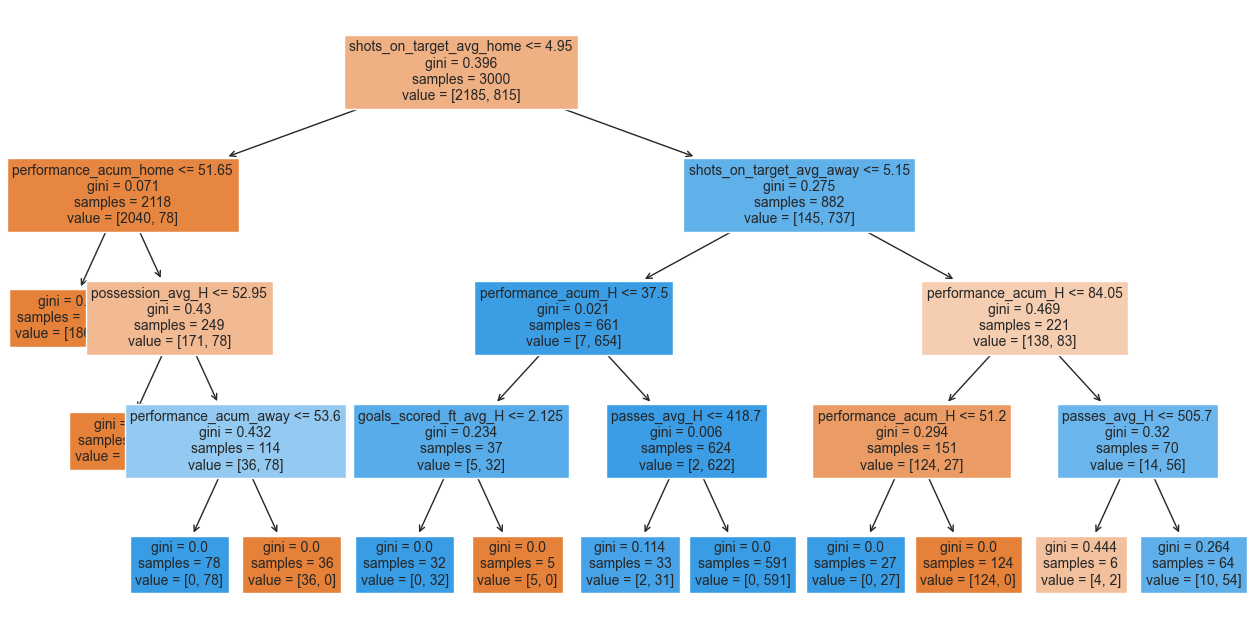

In [151]:
plt.figure(figsize=(16, 8))
plot_tree(decision_tree=model2, feature_names=explicativas_df4.columns, filled=True, fontsize=10)

In [154]:
test_elimination=test[['shots_on_target_avg_away','shots_on_target_avg_home','goals_scored_ft_avg_H','possession_avg_H','passes_avg_H','performance_acum_home','performance_acum_away','performance_acum_H','performance_acum_A']].head(3300)

In [172]:
explicativas_test_elimination=test_elimination.tail(300)

In [177]:
model2.predict(explicativas_test_elimination)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], d

In [174]:
y_pred2= model2.predict(explicativas_test_elimination)

In [165]:
df3_test["pred2"]=y_pred2
df3_test["pred2"]

3181    0
3182    0
3183    0
3184    1
3185    0
       ..
3497    0
3498    1
3499    0
3500    0
3501    0
Name: pred2, Length: 300, dtype: uint8

In [166]:
df3_test[["resultado_Victoria_local","pred2"]].head(10)

,resultado_Victoria_local,pred2
3181,0,0
3182,1,0
3183,0,0
3184,1,1
3185,1,0
3186,0,1
3187,1,0
3188,0,0
3189,0,0
3190,0,0


In [167]:
(df3_test["resultado_Victoria_local"]==df3_test["pred2"]).sum()

197

In [168]:
197/300

0.6566666666666666

Usando el feature selection el modelo mejora 14,66% su predicción, lo cuál hace que el overfiting sea  menor para el resultado con mayores posibilidades.

Insights

En principio un modelo de clasificación parecería ser mejor que uno de regresión si lo que se quiere es tener una predicción del resultado(victoria, empate, derrota) aunque la regresión lineal ayuda a conocer las variables importantes. No sirve de demasiado un modelo que luego de terminado el partido expliqué el resultado, además que un R cercano a 1 en algo tan aleatorio como un encuentro deportivo no parecería ser coherente. Lo que se intenta con el modelo de clasificación es colocando la mediana o media de las estadisticas de dos equipos hacer una predicción a futuro de sus posibilidades de victoria, el modelo predijo correctamente el resultado de victoria o no victoria en un porcentaje aceptable de encuentros y ha "achicado" el overfiting.

proximos pasos:

Mejorar el modelo de clasificación incluyendo lo que se vió con la regresión, quizas es posible ser más acertivo si se ajusta el foco, centrarlo en equipos en especifico, centrar mejor las variables importantes, ajustar la cercanía en el tiempo de las mismas, ejemplo; los equipos no juegan de la misma forma durante 10 años.


